
# Problem Statement :
      IRIS FLOWER CLASSIFICATION
    The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory classification tasks.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.shape

(150, 6)

In [10]:
df.duplicated().sum()

0

<AxesSubplot:>

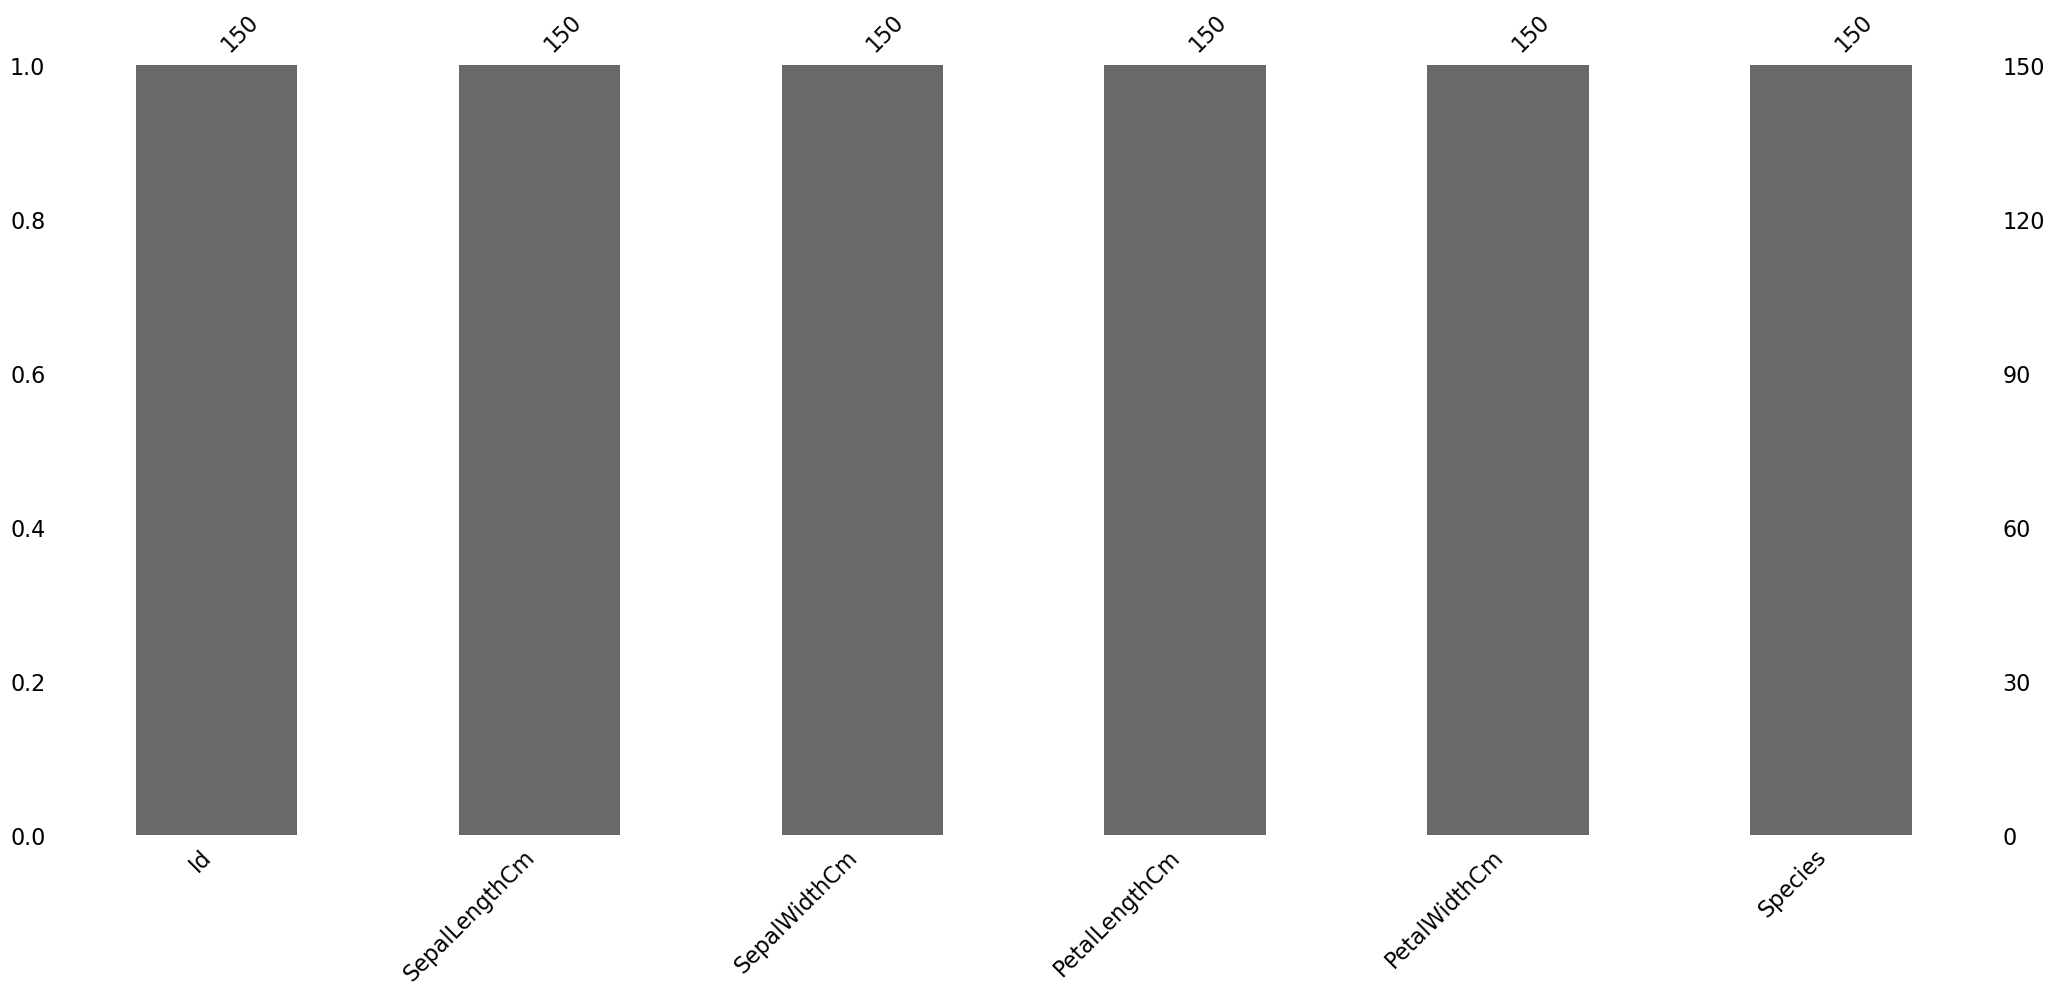

In [11]:
import missingno as msno
msno.bar(df)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

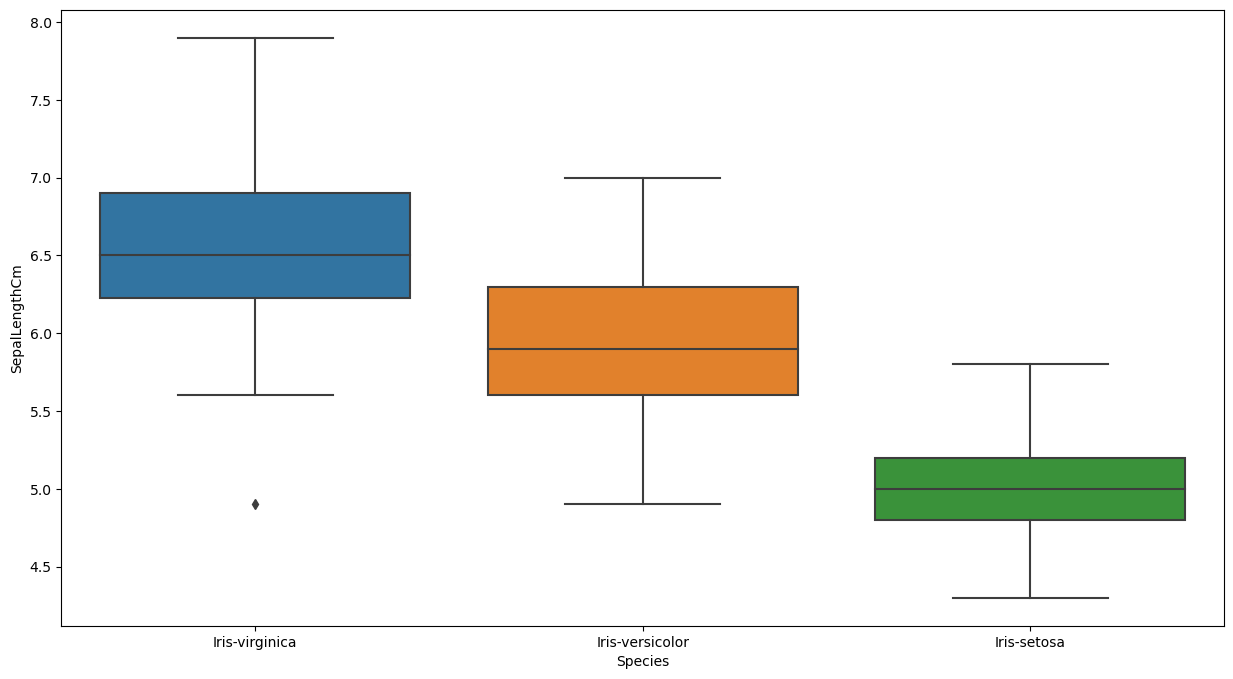

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

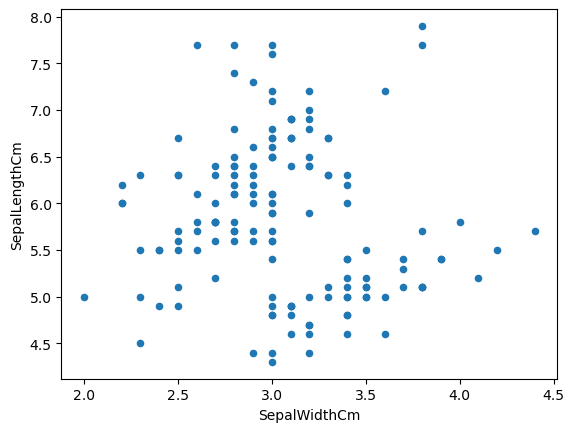

In [13]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


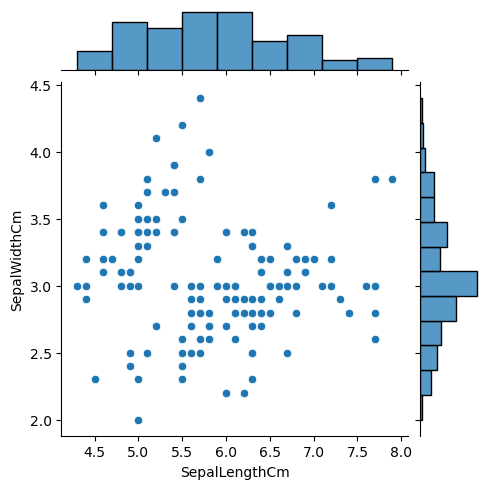

In [14]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

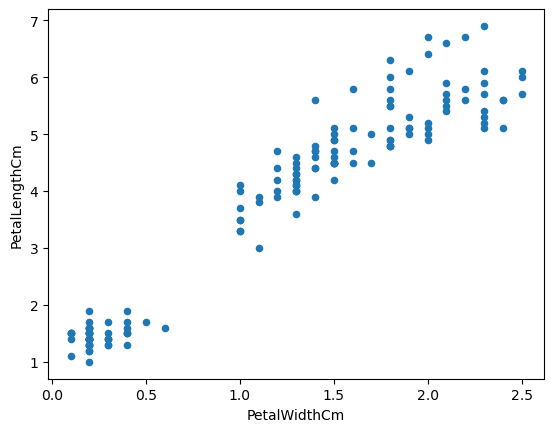

In [15]:
df.plot(kind='scatter',x='PetalWidthCm',y='PetalLengthCm')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


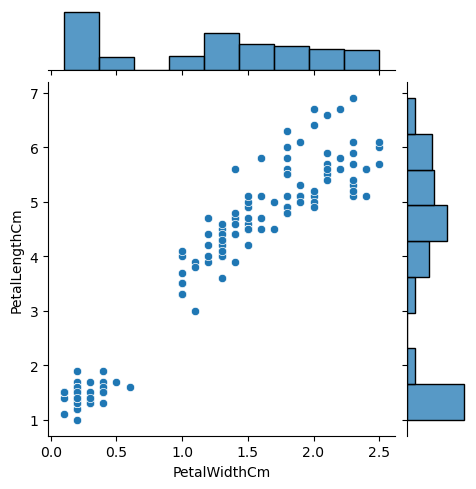

In [16]:
sns.jointplot(x="PetalWidthCm", y="PetalLengthCm", data=df, size=5)

In [17]:
setosa=df[df['Species']=='Iris-setosa']
setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [18]:
versicolor=df[df['Species']=='Iris-versicolor']
versicolor

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


In [19]:
virginica=df[df['Species']=='Iris-virginica']
virginica

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
106,107,4.9,2.5,4.5,1.7,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica


In [20]:
#
print("Size of the virginica",virginica.shape)
print("Size of the versicolor",versicolor.shape)
print("Size of the setosa",setosa.shape)

Size of the virginica (50, 6)
Size of the versicolor (50, 6)
Size of the setosa (50, 6)


In [21]:
#plt.scatter(virginica['PetalLengthCm'],virginica['PetalWidthCm'],color='k',label='Virginica')
#plt.scatter(setosa['PetalLengthCm'],setosa['PetalWidthCm'],color='g',label='Setosa')
#plt.scatter(versicolor['PetalLengthCm'],versicolor['PetalWidthCm'],color='r',label='Versicolor')
#plt.legend()

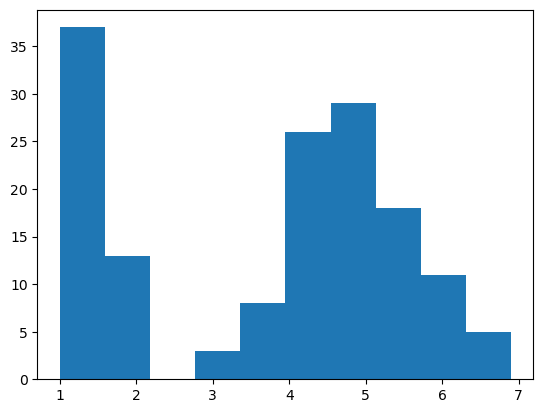

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

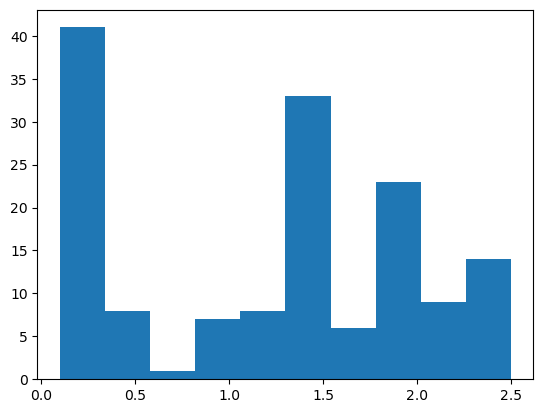

In [22]:
plt.hist(df['PetalLengthCm'])
plt.show()
plt.hist(df['PetalWidthCm'])

<Figure size 1500x900 with 0 Axes>

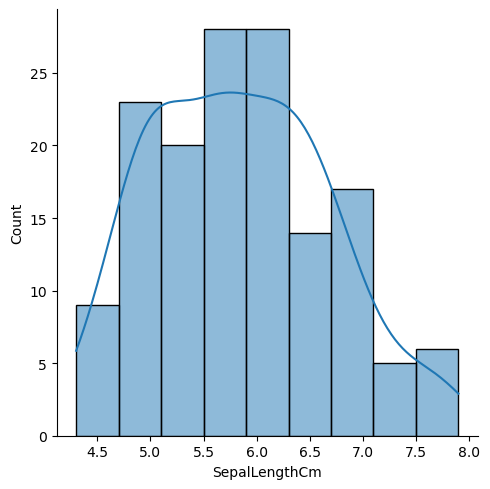

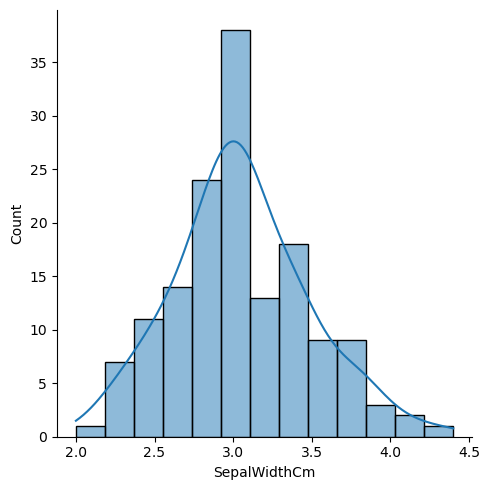

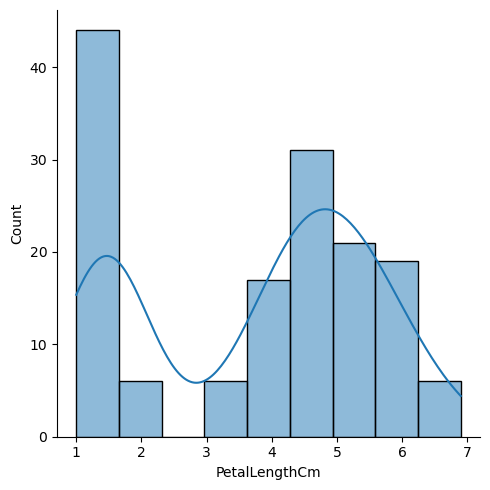

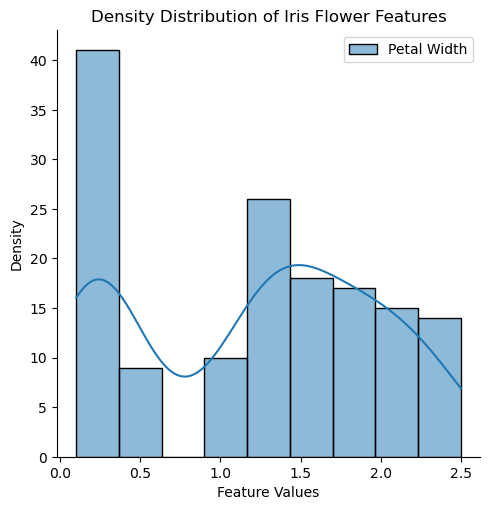

In [23]:
plt.figure(figsize=(15, 9))

sns.displot(data=df, x='SepalLengthCm', label='Sepal Length', kde=True)
sns.displot(data=df, x='SepalWidthCm', label='Sepal Width', kde=True)
sns.displot(data=df, x='PetalLengthCm', label='Petal Length', kde=True)
sns.displot(data=df, x='PetalWidthCm', label='Petal Width', kde=True)

plt.legend()
plt.title('Density Distribution of Iris Flower Features')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.show()

Text(0, 0.5, 'Length/Width')

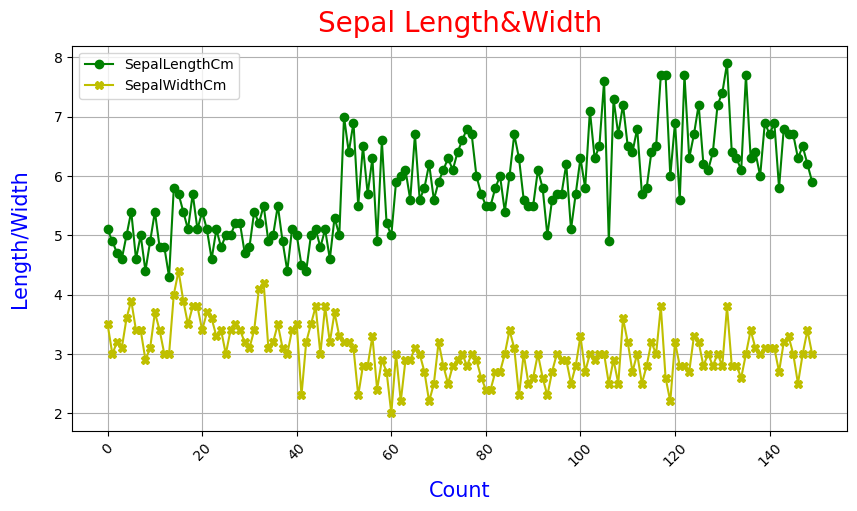

In [24]:
df['SepalLengthCm'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
df['SepalWidthCm'].plot(kind='line',legend=True,marker="X",color='y',figsize=(10,5),grid=True,rot=45)
plt.title('Sepal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

Text(0, 0.5, 'Length/Width')

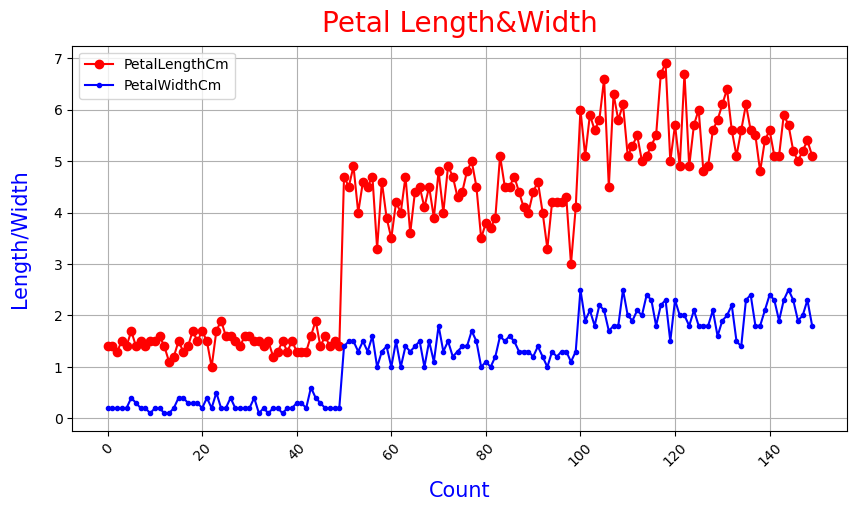

In [25]:
df['PetalLengthCm'].plot(kind='line',legend=True,marker='o',color='r',figsize=(10,5),grid=True,rot=45)
df['PetalWidthCm'].plot(kind='line',legend=True,marker=".",color='b',figsize=(10,5),grid=True,rot=45)
plt.title('Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

Text(0, 0.5, 'Length/Width')

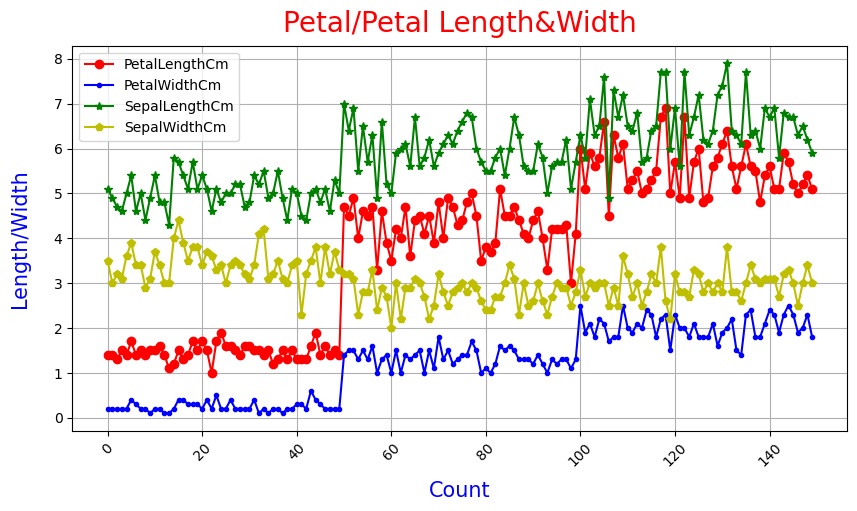

In [26]:
df['PetalLengthCm'].plot(kind='line',legend=True,marker='o',color='r',figsize=(10,5),grid=True,rot=45)
df['PetalWidthCm'].plot(kind='line',legend=True,marker=".",color='b',figsize=(10,5),grid=True,rot=45)
df['SepalLengthCm'].plot(kind='line',legend=True,marker="*",color='g',figsize=(10,5),grid=True,rot=45)
df['SepalWidthCm'].plot(kind='line',legend=True,marker="p",color='y',figsize=(10,5),grid=True,rot=45)
plt.title('Petal/Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

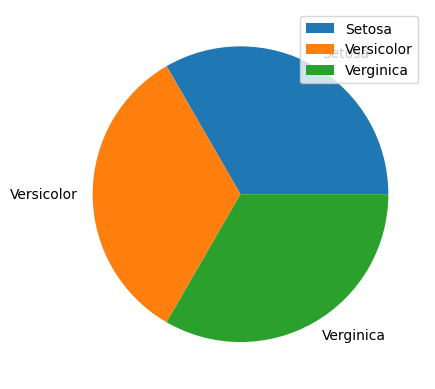

In [27]:
plt.pie(df['Species'].value_counts(),labels=['Setosa','Versicolor','Verginica'])
plt.legend()

<Figure size 1700x600 with 0 Axes>

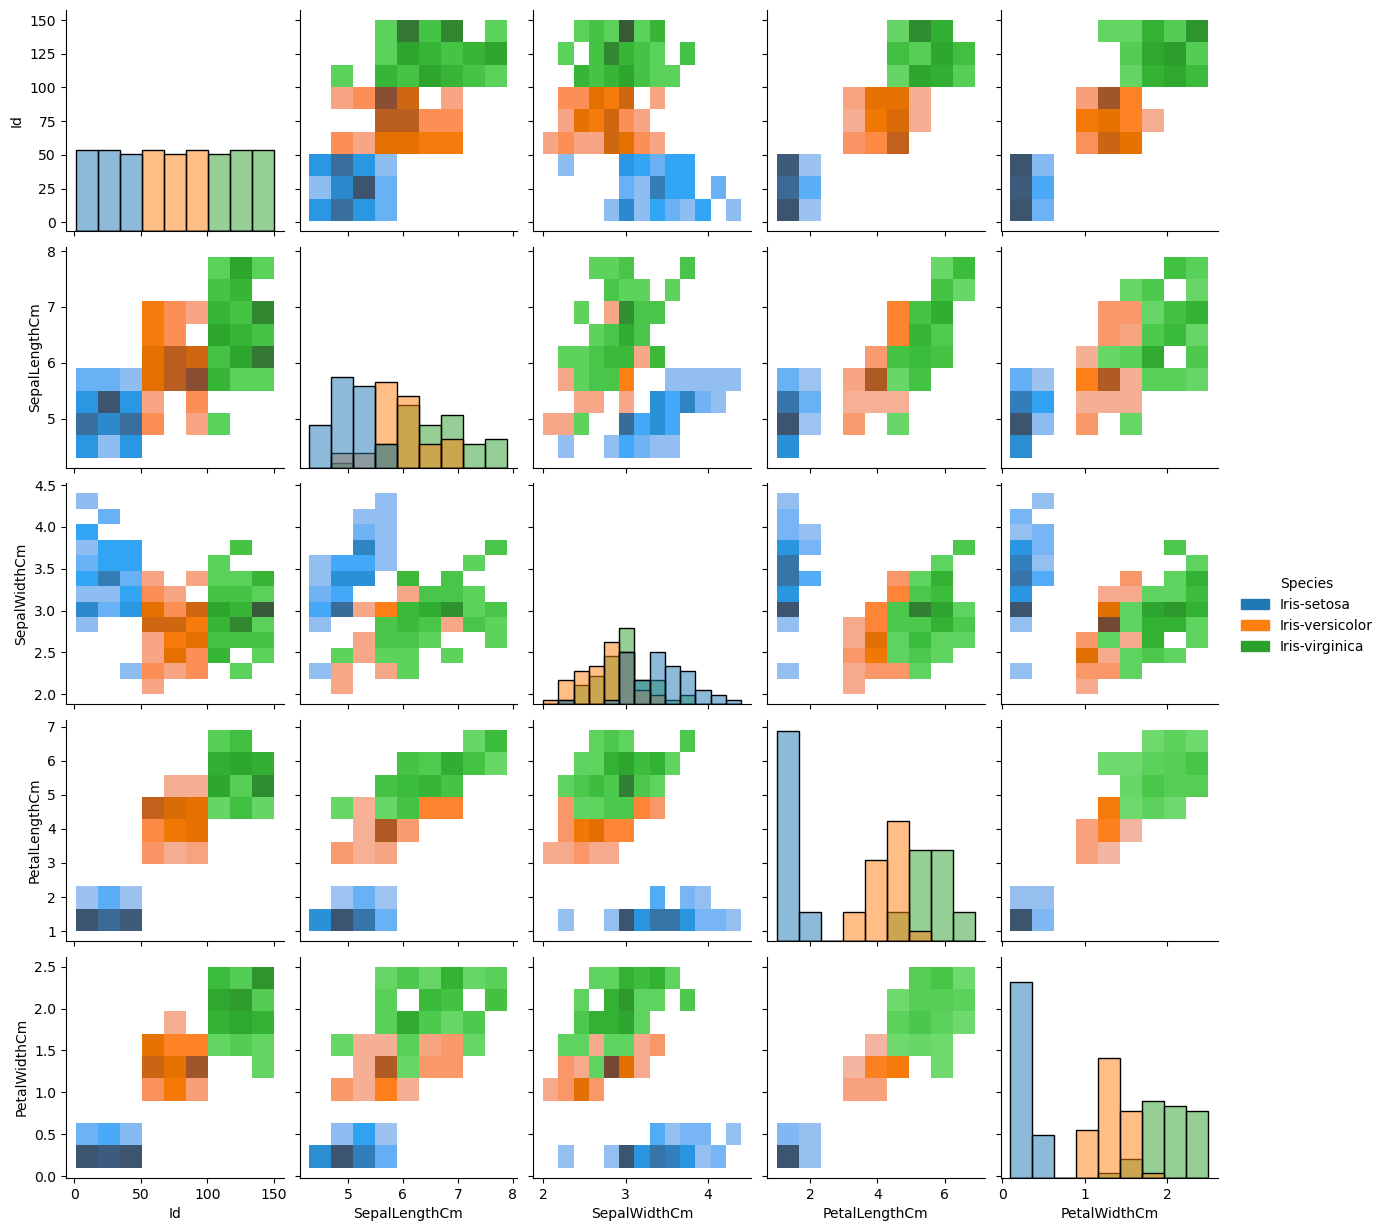

In [28]:
plt.figure(figsize=(17, 6))
sns.pairplot(df, hue='Species', kind='hist')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


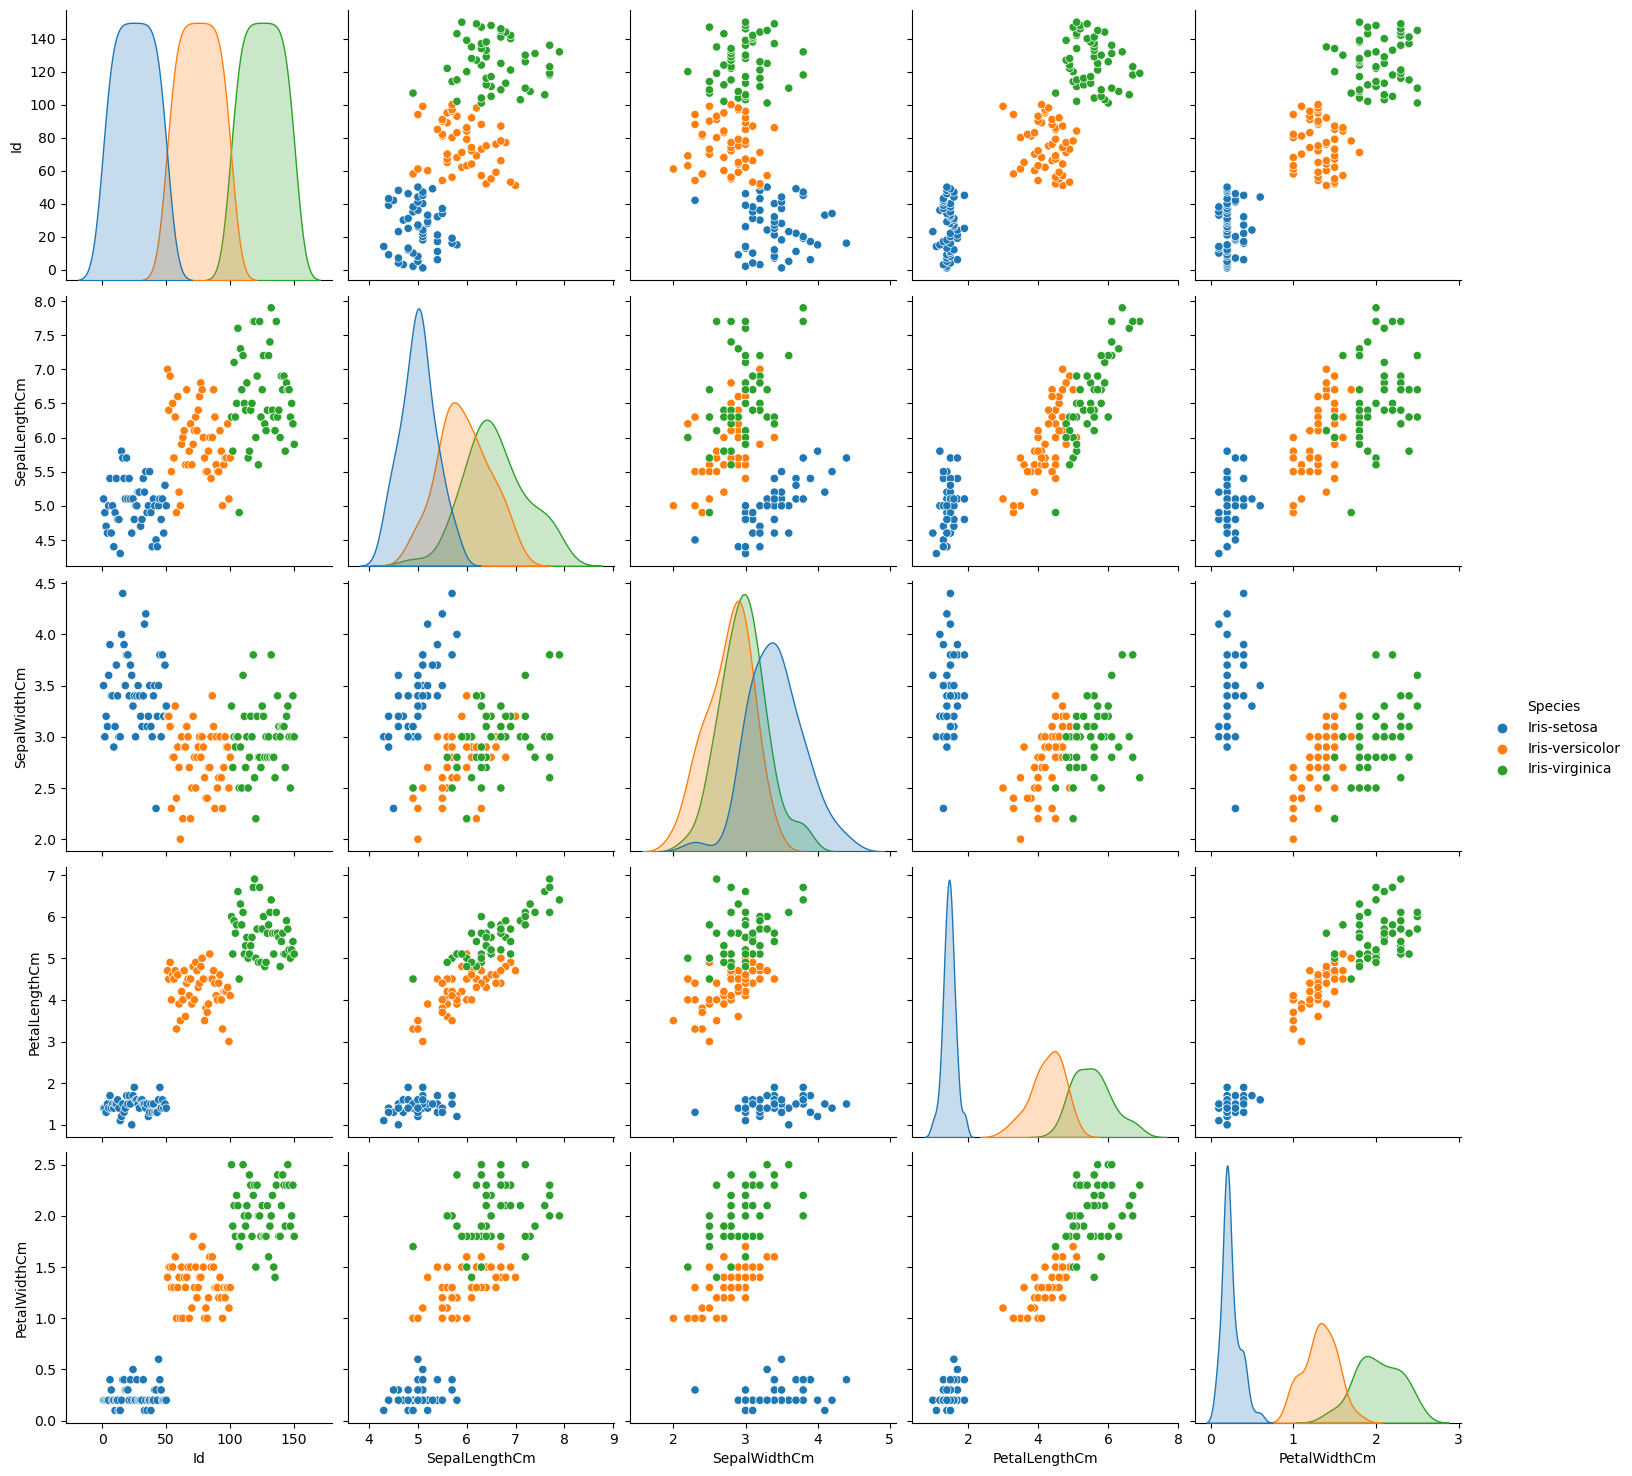

In [29]:
sns.pairplot(df, hue="Species", size=3)

<Figure size 1700x600 with 0 Axes>

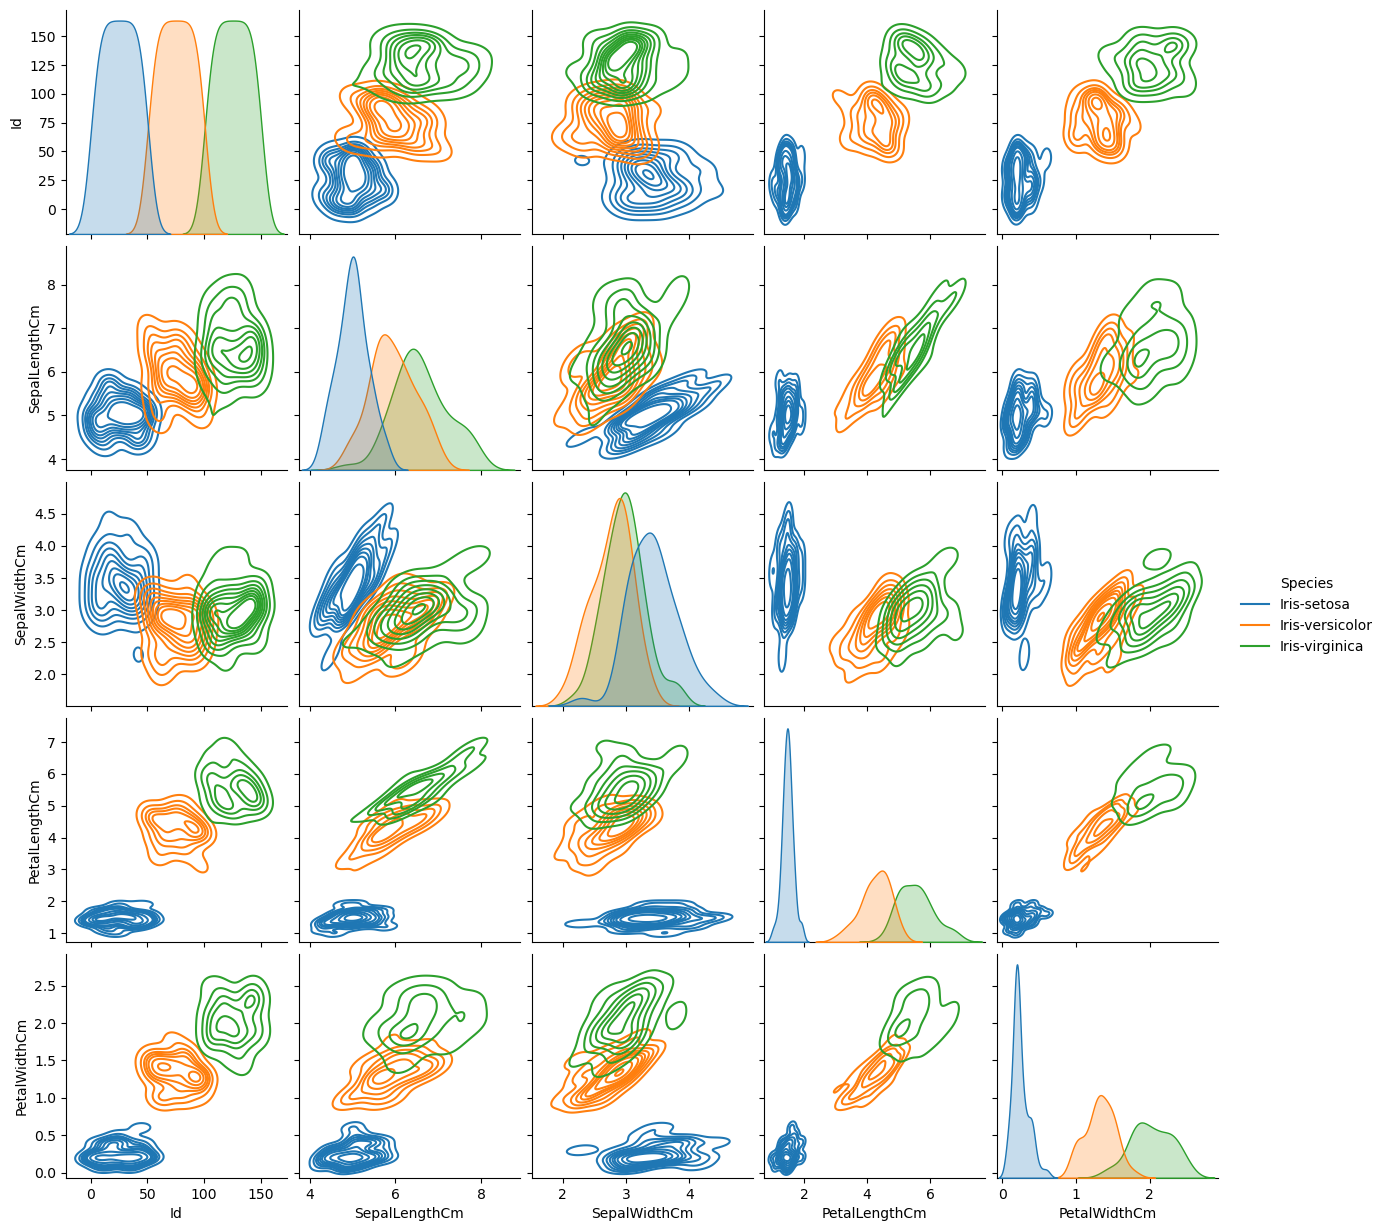

In [30]:
plt.figure(figsize=(17, 6))
sns.pairplot(df, hue='Species', kind='kde')
plt.show()

array([[<AxesSubplot:title={'center':'Id'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>,
        <AxesSubplot:>]], dtype=object)

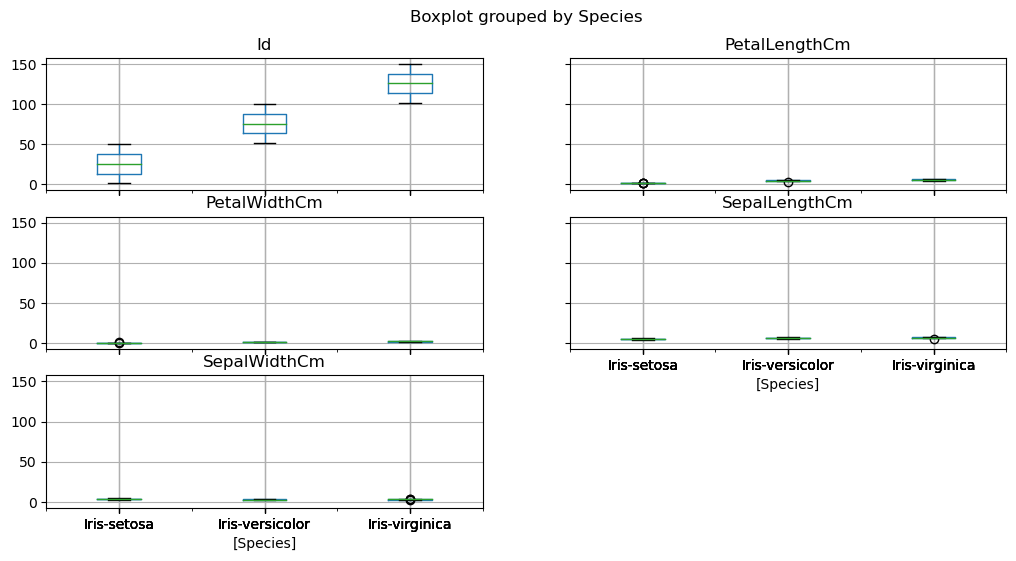

In [31]:
df.boxplot(by="Species", figsize=(12, 6))

<AxesSubplot:>

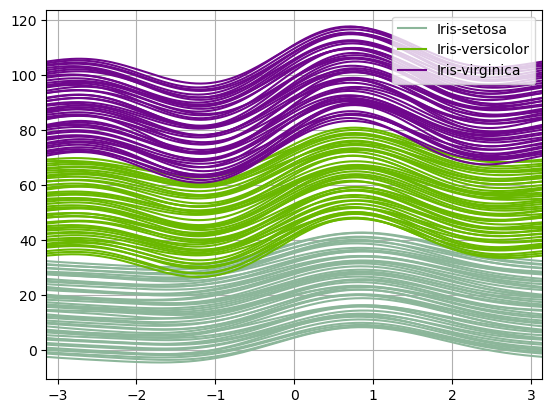

In [32]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1500x1500 with 0 Axes>

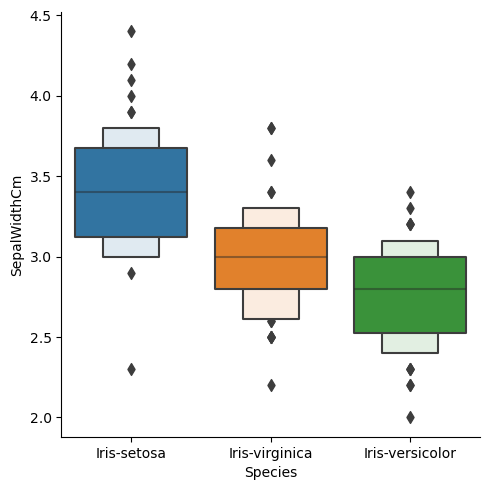

In [33]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

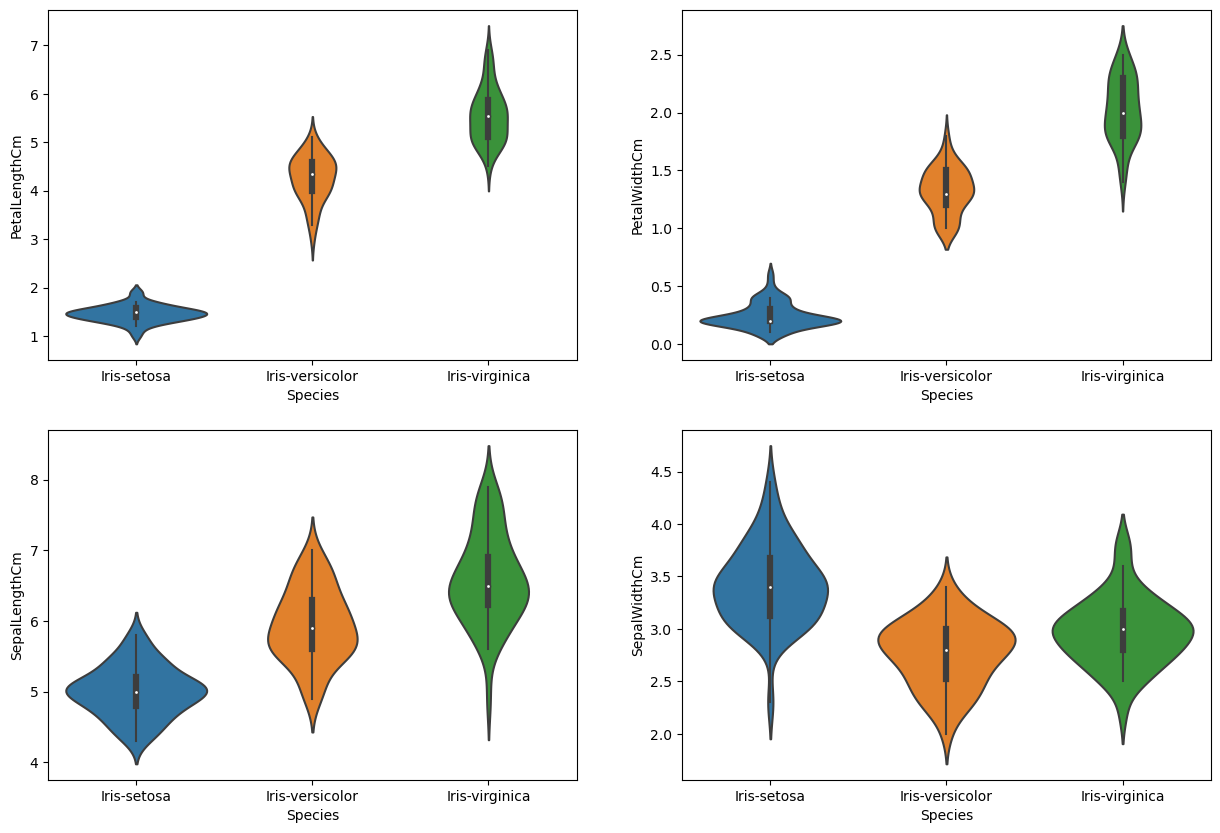

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [35]:
le = LabelEncoder()

In [36]:
df['Species']=le.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


Train & Test

In [37]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:4],df['Species'],test_size=0.2,random_state=2)

In [38]:
# Create a logistic regression model with a higher max_iter
model = LogisticRegression(max_iter=1000)  # Increase max_iter value

In [39]:
# Fit the model to your data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
test = model.predict(X_test)
for tests in test:
    print("..",tests)

.. 0
.. 0
.. 2
.. 0
.. 0
.. 2
.. 0
.. 2
.. 2
.. 0
.. 0
.. 0
.. 0
.. 0
.. 1
.. 1
.. 0
.. 1
.. 2
.. 1
.. 1
.. 1
.. 2
.. 1
.. 1
.. 0
.. 0
.. 2
.. 0
.. 2


In [41]:
model.score(X_test,y_test)

1.0

In [42]:
model.score(X_test,y_test)*100

100.0

In [43]:
y_test.values

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

## Conclusion:
### IRIS FLOWER CLASSIFICATION

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.